#CIS 430 Final Project
###Ameh Ojonukpemi Felix

###Step1 Set-Up
Importing the necessary libraries and stuff. 
 

*   Going down the list pandas, matplot and numpy are all standard data manipulation and visualization libraries.
*   Next I do this thing I saw in a tutorial once where they said doing %matplotlib inline makes your diagrams come out better on colab.
*   I import the actual clustering algorithm and hierarchical clustering method from sklearn and scipy respectively.
*   And finally, I mount and cd to my Google Drive where I saved the kaggle car sensor dataset 




 
 
 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

%matplotlib inline
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Project3:VDP/SampleDataSets

/content/drive/MyDrive/Project3:VDP/SampleDataSets


###Step 2 Data Loading and Preprocessing

Using pandas, I can import the dataset, saved as a csv, into a pandas dataframe where the features and nature of the dataset can be seen more clearly 




In [ ]:
data = pd.read_csv('kaggleOBD_10252022.csv')

In [ ]:
data

GPS Time  Device Time   Longitude   Latitude  \
0     Thu Nov 02 15:44:24 CDT 2017      44:25.1  -97.662474  30.483089   
1     Thu Nov 02 15:44:25 CDT 2017      44:26.1  -97.662476  30.483068   
2     Thu Nov 02 15:44:26 CDT 2017      44:27.1  -97.662478  30.483006   
3     Thu Nov 02 15:44:27 CDT 2017      44:28.1  -97.662546  30.482689   
4     Thu Nov 02 15:44:27 CDT 2017      44:29.1  -97.662546  30.482689   
...                            ...          ...         ...        ...   
1351  Thu Nov 02 16:06:56 CDT 2017      06:56.1  -97.768033  30.574161   
1352  Thu Nov 02 16:06:57 CDT 2017      06:57.1  -97.768063  30.574162   
1353  Thu Nov 02 16:06:58 CDT 2017      06:58.1  -97.768094  30.574162   
1354  Thu Nov 02 16:06:58 CDT 2017      06:59.1  -97.768094  30.574162   
1355  Thu Nov 02 16:06:58 CDT 2017      07:00.1  -97.768094  30.574162   

      GPS Speed (Meters/second)   Horizontal Dilution of Precision   Altitude  \
0                      2.795157                                 93        250   
1                      0.000000                                 98        255   
2                      0.000000                                105        247   
3                      0.000000                                101        225   
4                      0.000000                                101        225   
...                         ...                                ...        ...   
1351                   2.946795                                 21        272   
1352                   2.936818                                 22        272   
1353                   2.926175                                 25        272   
1354                   2.926175                                 25        272   
1355                   2.926175                                 25        272   

       Bearing      G(x)      G(y)       G(z)   G(calibrated)  \
0        211.6  0.350434  9.163701  -2.947818        0.000910   
1          0.0 -6.745979  4.394452  -4.039574       -0.062790   
2          0.0 -0.923281  7.736757   3.870868       -0.094130   
3          0.0 -4.792311  2.172633  16.387754        0.773513   
4          0.0 -0.061368  7.190879   6.686450        0.038575   
...        ...       ...       ...        ...             ...   
1351     271.7  1.591742  5.998988   7.163911       -0.014786   
1352     271.7  0.500446  5.223496   8.457009        0.033547   
1353     271.6 -0.667925  5.855566   7.844094        0.019143   
1354     271.6  0.481292  5.453340   8.064361        0.012580   
1355     271.6 -1.817141  5.865143   7.681288        0.021429   

      Engine Coolant Temperature(°C)  Engine RPM(rpm)  \
0                                 56          2623.25   
1                                 56          3169.50   
2                                 56          2587.50   
3                                 57          2753.00   
4                                 57          2957.00   
...                              ...              ...   
1351                              89           718.75   
1352                              89           798.25   
1353                              89           799.00   
1354                              89           784.25   
1355                              89           644.50   

      Intake Air Temperature(°C)  Engine Load(%)  Mass Air Flow Rate(g/s)  \
0                             30       92.549019                33.759998   
1                             30       90.980392                37.200001   
2                             30       98.431374                35.180000   
3                             30       98.039215                38.040001   
4                             30       96.862747                39.349998   
...                          ...             ...                      ...   
1351                          32       47.843140                 3.920000   
1352                          32       46.666668                 3.750000   
1353 

Using df.info(), we can see some features that won't really work for clustering, i.e the object types for GPS and Device time. In the first run, these columns will be omitted, and I will come back and see if they can be changed into a proceessable format.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   GPS Time                           1356 non-null   object 
 1    Device Time                       1356 non-null   object 
 2    Longitude                         1356 non-null   float64
 3    Latitude                          1356 non-null   float64
 4   GPS Speed (Meters/second)          1356 non-null   float64
 5    Horizontal Dilution of Precision  1356 non-null   int64  
 6    Altitude                          1356 non-null   int64  
 7    Bearing                           1356 non-null   float64
 8    G(x)                              1356 non-null   float64
 9    G(y)                              1356 non-null   float64
 10   G(z)                              1356 non-null   float64
 11   G(calibrated)                     1356 non-null   float

In [ ]:
data.drop([' Device Time', 'GPS Time'], axis = 1, inplace=True)

Commented out is the normalized dataset which I talk about in the Conclusion.

In [ ]:
'''
from sklearn import preprocessing

x = data.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data = pd.DataFrame(x_scaled)
data
'''

###Step 3 Clustering
Next, the hierarchical clustering algorithm from scipy is called, the time columns are also dropped as mentioned before and the results from this algorithm are displayed using matplotlib
\
\
From the figure, we can clearly see 3 main clusters, and there's a more formal method of determining this I'm sure but just looking at the greatest 'distances' in the figure (the blue lines), we can confidently say there are 3 clusters.


In [ ]:
data.to_csv('dataset430.csv')

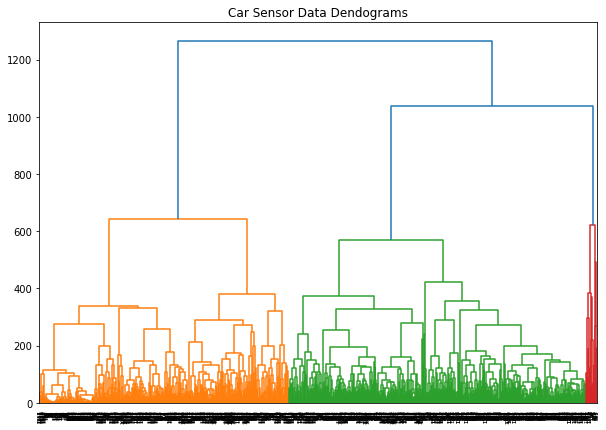

In [13]:
plt.figure(figsize=(10, 7))
plt.title("Car Sensor Data Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='average'))

The output of this algorithm is a dendogram so to actually create labels for the dataset is where sklearns AgglomerativeClustering function comes in. I belive these to be the exact same on the inside except AggCl requires the number of clusters to be known and it outputs an array of labels. So the way I've always done clustering is to first make the dendogram and determine from that the number of clusters, then use AggCl to attach the labels to the dataset.

In [ ]:
cl = []
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
cluster.fit_predict(data)
cl = cluster.labels_

In [ ]:
data['label'] = cl
data.head(10)

Longitude   Latitude  GPS Speed (Meters/second)  \
0  -97.662474  30.483089                   2.795157   
1  -97.662476  30.483068                   0.000000   
2  -97.662478  30.483006                   0.000000   
3  -97.662546  30.482689                   0.000000   
4  -97.662546  30.482689                   0.000000   
5  -97.662546  30.482689                   0.000000   
6  -97.662546  30.482689                   0.000000   
7  -97.662546  30.482689                   0.000000   
8  -97.662546  30.482689                   0.000000   
9  -97.662546  30.482689                   0.000000   

    Horizontal Dilution of Precision   Altitude   Bearing      G(x)      G(y)  \
0                                 93        250     211.6  0.350434  9.163701   
1                                 98        255       0.0 -6.745979  4.394452   
2                                105        247       0.0 -0.923281  7.736757   
3                                101        225       0.0 -4.792311  2.172633   
4                                101        225       0.0 -0.061368  7.190879   
5                                101        225       0.0  0.695200  7.344568   
6                                101        225       0.0  0.331281  7.181762   
7                                101        225       0.0  1.164463  7.574411   
8                                101        225       0.0  0.896312  6.779536   
9                                101        225       0.0  1.183617  6.549693   

        G(z)   G(calibrated)  Engine Coolant Temperature(°C)  Engine RPM(rpm)  \
0  -2.947818        0.000910                              56          2623.25   
1  -4.039574       -0.062790                              56          3169.50   
2   3.870868       -0.094130                              56          2587.50   
3  16.387754        0.773513                              57          2753.00   
4   6.686450        0.038575                              57          2957.00   
5   6.993827        0.050246                              57          3158.50   
6   7.118325        0.050316                              57          3430.25   
7   5.586036       -0.014311                              58          2927.25   
8   7.961084        0.088823                              58          2267.00   
9   7.616319        0.050063                              58          2353.75   

   Intake Air Temperature(°C)  Engine Load(%)  Mass Air Flow Rate(g/s)  \
0                          30       92.549019                33.759998   
1                          30       90.980392                37.200001   
2                          30       98.431374                35.180000   
3                          30       98.039215                38.040001   
4                          30       96.862747                39.349998   
5                          30       97.254906                41.930000   
6                          30       95.294121                48.090000   
7                          30       65.490196                 4.010000   
8                          30       77.647057                27.780001   
9                          30       93.333336                31.420000   

   Throttle Position(Manifold)(%)  label  
0                       32.549019      2  
1                       32.549019      1  
2                       37.647060      2  
3                       39.215687      2  
4                       38.823528      1  
5                       40.000000      1  
6                       40.392159      1  
7                       16.470589      1  
8                       29.411766      2  
9                       31.764706      2

###Step 4 Analysis
The next logical step is to see if this clustering gave me an answer to my original question, which was to find out if there are natural groupings of driver behaviour that can arise from car sensor data. (I would once again like to apologize for the cop out, this is basically stuff for my Senior Design project so the dataset isn't so interesting, but hey two birds one stone and all)
\
A good way to figure this out is to see what type of datapoints got what label and why this makes sense, or why it doesn't
\
\
First, using seaborn we can visualize a pairplot of all the features in the dataset and using our new labels we can identify which set of features seem to prosuce the clearest clusters and from there more insight can be gained on the defining features of our clusters and if we should accept this as a good clustering  

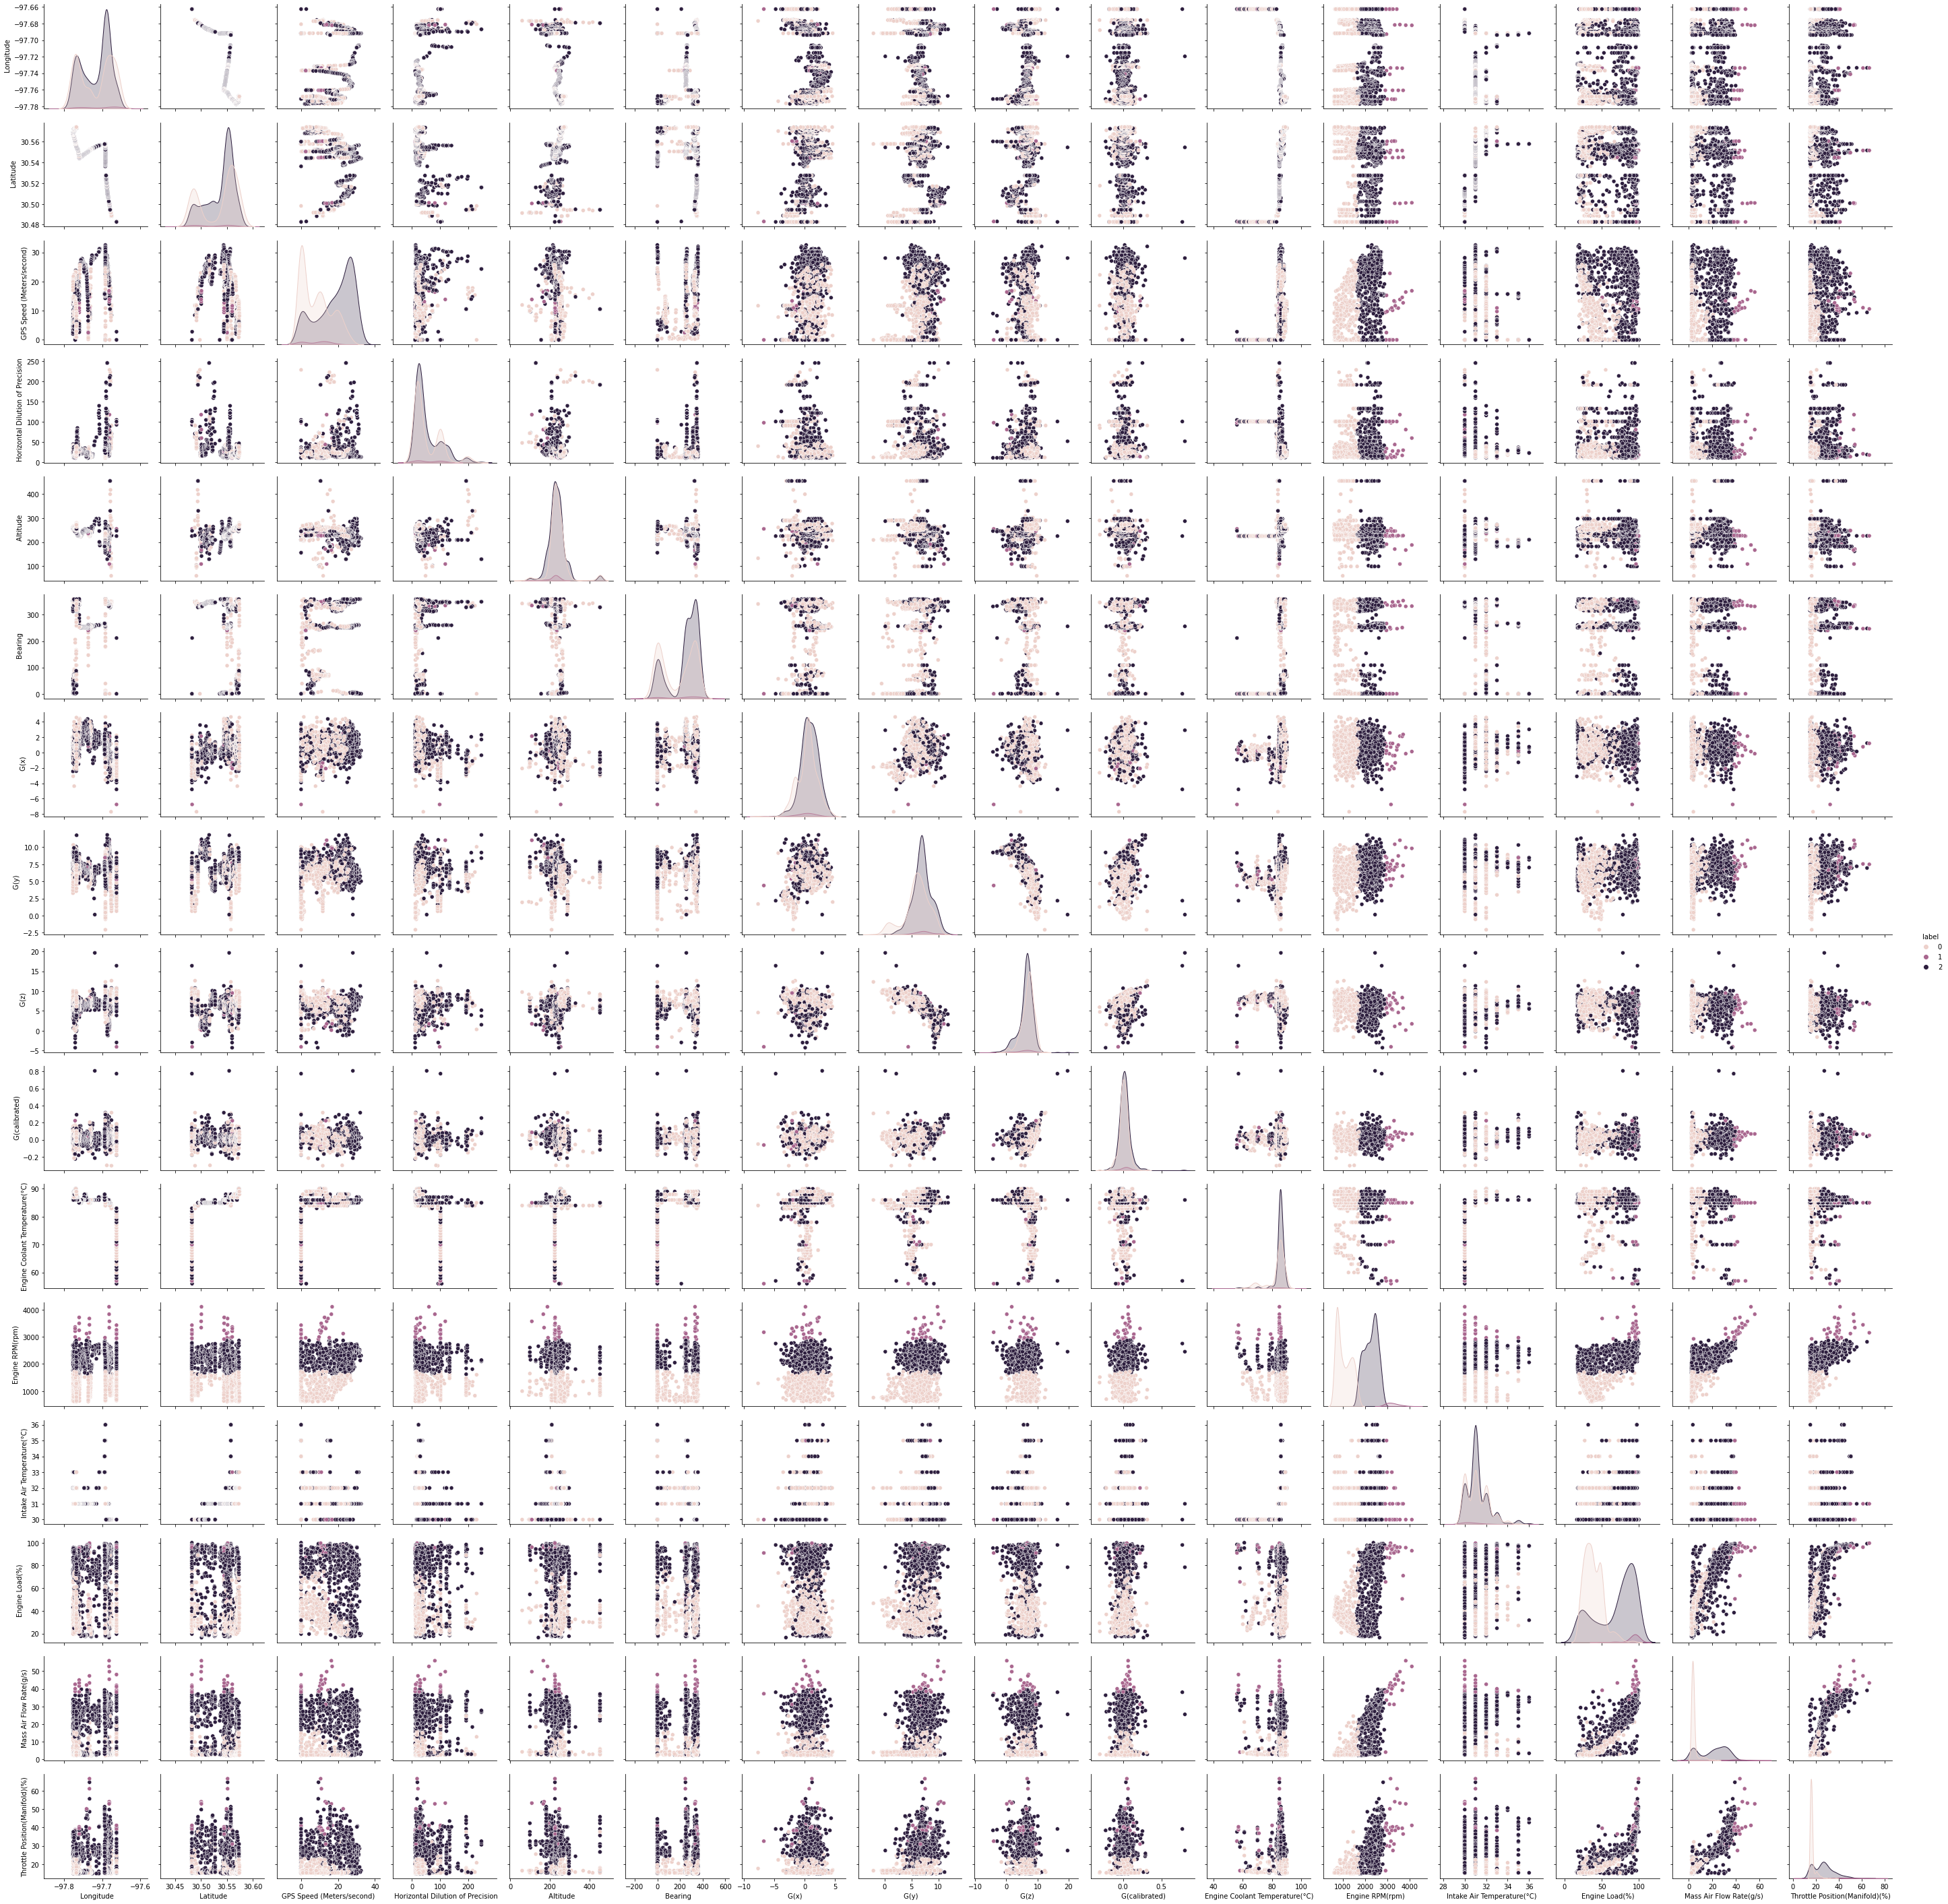

In [ ]:
import seaborn as sns
sns.pairplot(data.iloc[:, :17], hue= 'label', diag_kind='kde');

From this graph, which is a bit hard to look at sorry, we can kind of see that the columns containing location data weren't really considered as the colors (labels) are all mixed and bunched together
\
So if we focus on only the engine details...

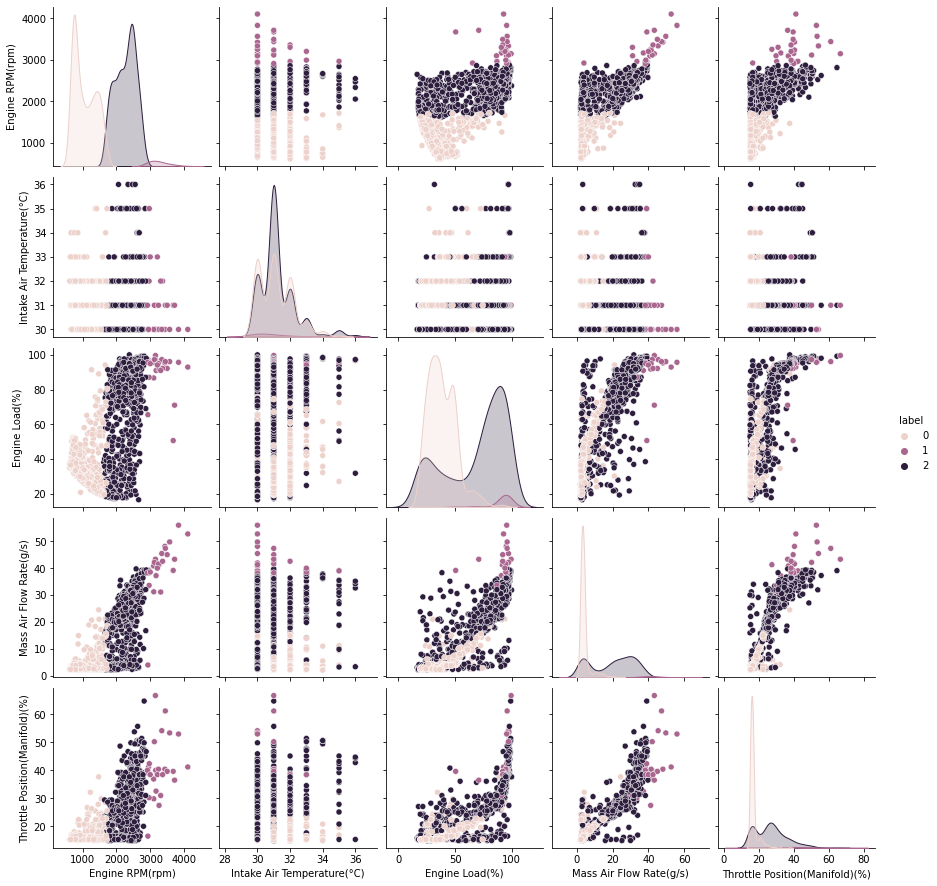

In [ ]:
sns.pairplot(data.iloc[:, 11:17], hue= 'label', diag_kind='kde');

It now becomes very apparent that Engine RPM is clearly the feature that this clustering was based off of. It's almost like someone took a ruler to its graphs


###Conclusion
From the visualizations we've seen so far, we can sumrise that our clustering so far identifies 3 distinct groupings. From the graphs of Engine RPM, I would venture to say the clustering basically identifies a low or near zero speed, a middle or regular speed, and a very high speed as the three 'behaviours' this driver exhibits on this particular drive. It may not be very clear cut, for instance Engine RPM could be increased by like revving the engine but you wouldnt really be going anywhere, this would be an excellent use for the location detials actually, and we can even see from throttle position that isn't always the case either.
\
\
I would still say that this clustering was accurate however, because based on the input data, which is just car sensor data, the information we can learn wouldn't be very comprehensive and would be out of context. For instance High RPM means a lot more when the location details can tell you that that high RPM was in a school zone. 
\
\
To highlight some previous attempts and approaches, I first tried to normalize the data, based on some blog on clustering I saw, using sklearn's preprocessing library and basically the dataframe was scaled to between 0 and 1. This produced a lot of clusters on the dendogram, I'll attach some pictures, and the visualizations of the clsuters didn't make much sense, there weren't any clear groupings in the scatter plots. So I decided to just go with the dataset as is, as it had produced 'analyzable' results. 
\
Additionally, when I decided to omit location data in the final scatterplots, I went back to see if removing them from dataset and then creating a dendogram would change the outcome, and sure enough it had basically no effect and 3 clusters, with almost the exact tree shape, can be identified. Pictures for that as well.
\
\
Finally I wanted to mention like further research, like a proper academic report. I would say finding a dataset that contains more comprehensive data, for instance speed over the speed limit or something like that, would be much more helpful to identify more interesting and useful groupings. Additionally, I had wanted to sue a dataset that contained data from more than one driver, and see if the clusters aligned with each driver. Unfortunately I wasn't able to get that dataset to work with pandas before the last homework.


##C'est fini !
Thank you for the amazing class!!

##Pictures

###Fig1
Dendogram generate with no location features in the dataset, i.e columns 0-11 I think

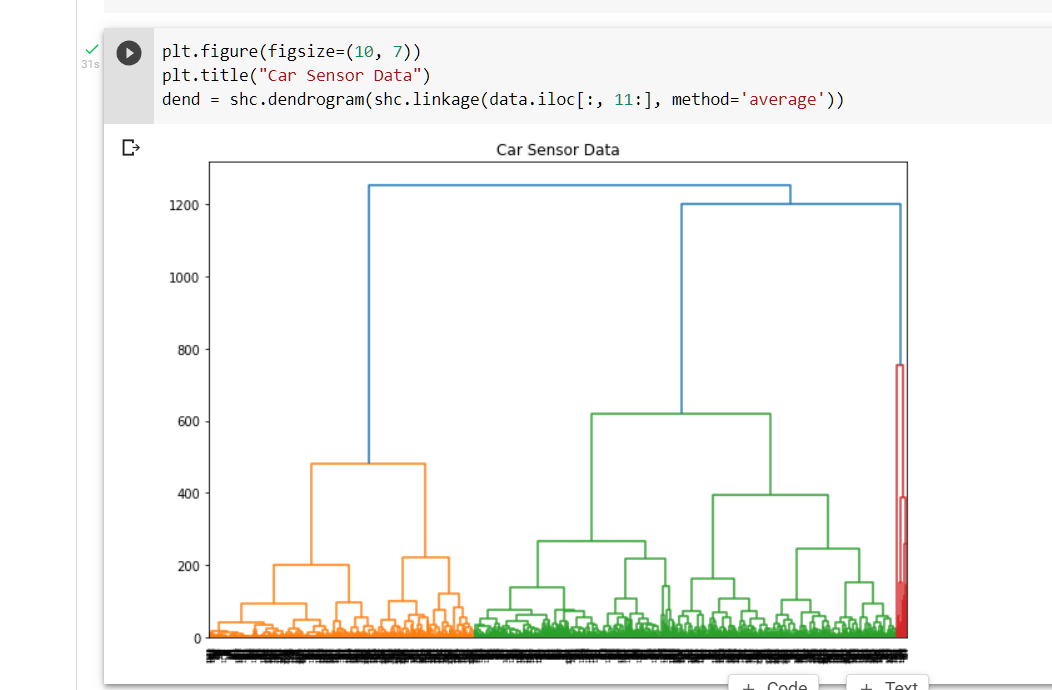

###Fig2
Dendogram generated with the normalized dataset

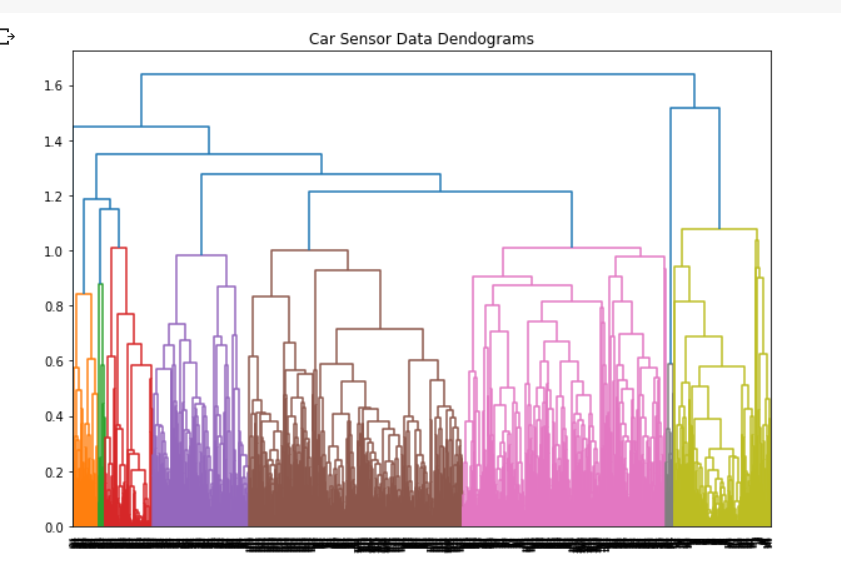

###Fig3
Scatterplots generated with Normalized dataset
\
*See attached, the image is too big and it messes with colab